
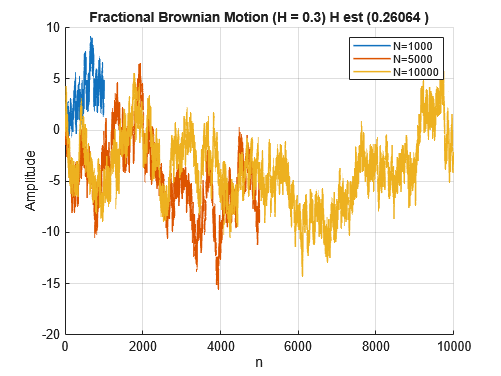


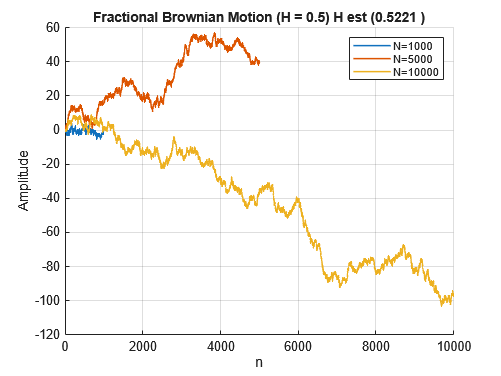

In [1]:
clear; close all; clc;
warning('off','MATLAB:plot:IgnoreImaginaryXYPart')

%% ---------------------------------------------------------
% PARAMETERS
% ---------------------------------------------------------
Hvals = [0.3, 0.5, 0.7];
Nvals = [1000, 5000, 10000];
numH  = numel(Hvals);
numN  = numel(Nvals);

colorsN = lines(numN);

%% ---------------------------------------------------------
% STORAGE
% ---------------------------------------------------------
fbm        = cell(numH, numN);
structfunc = cell(numH, numN);
Sqa        = cell(numH, numN);
C1         = cell(numH, numN);
C2         = cell(numH, numN);
C3         = cell(numH, numN);
logscales  = cell(numH, numN);
hexp       = cell(numH, numN);

%% ---------------------------------------------------------
% MAIN LOOP — WTMM GLOBAL ANALYSIS
% ---------------------------------------------------------
for hi = 1:numH
    for ni = 1:numN

        H = Hvals(hi);
        N = Nvals(ni);

        % Generate fractional Brownian motion
        fbm{hi,ni} = wfbm(H, N);

        % WTMM global analysis
        [hexp{hi,ni}, ~, structfunc{hi,ni}] = wtmm(fbm{hi,ni});

        % Extract structure function components
        Tq        = structfunc{hi,ni}.Tq;        % Ns × 44
        loga      = structfunc{hi,ni}.logscales; % Ns × 1

        % Structure functions S(q,a) for q = -2:0.1:2
        Sqa{hi,ni} = Tq(:,1:41);

        % Cumulants C1, C2, C3
        C1{hi,ni} = Tq(:,42);
        C2{hi,ni} = Tq(:,43);
        C3{hi,ni} = Tq(:,44);

        logscales{hi,ni} = loga;
    end
end

%% ---------------------------------------------------------
% 1. SHOW THE NOISE (FBM)
% ---------------------------------------------------------
for hi = 1:numH
    figure; hold on;
    for ni = 1:numN
        plot(fbm{hi,ni}, 'Color', colorsN(ni,:), 'LineWidth', 1.2)
    end
    title("Fractional Brownian Motion (H = " + string(Hvals(hi)) + ") H est (" + string(hexp{hi,ni})+" )")
    xlabel("n"); ylabel("Amplitude")
    legend("N="+string(Nvals))
    grid on
end

<center>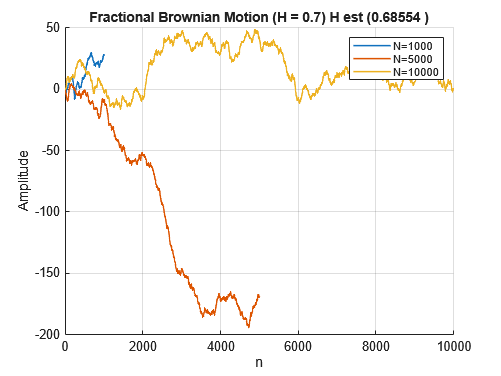</center>




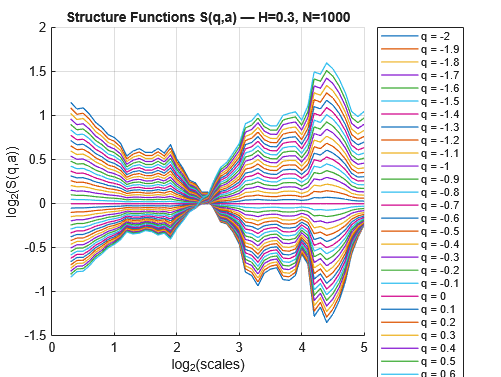


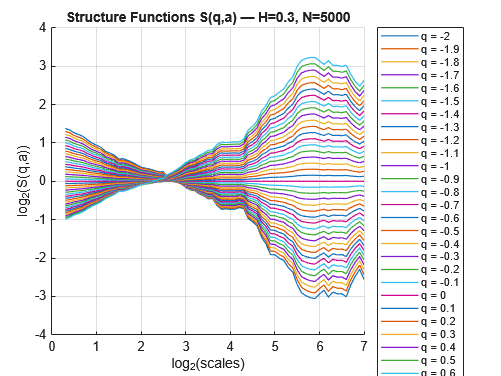

In [2]:

%% ---------------------------------------------------------
% 2. SHOW STRUCTURE FUNCTIONS S(q,a)
% ---------------------------------------------------------
q_axis = linspace(-2, 2, 41);   % q values for WTMM structure functions

for hi = 1:numH
    for ni = 1:numN

        S = Sqa{hi,ni};                 % Ns × 41
        loga = structfunc{hi,ni}.logscales;   % Ns × 1
        scales = 2.^loga;               % convert log2(a) → a

        figure; hold on;

        plot(loga, S(:,:), 'LineWidth', 1.0)


        % Legend labels: "a = scale_value"
        legendStrings = "q = " + string(round(q_axis, 3));
        legend(legendStrings, "Location", "bestoutside")

        xlabel("log_2(scales)")
        ylabel("log_2(S(q,a))")
        title("Structure Functions S(q,a) — H="+string(Hvals(hi))+", N="+string(Nvals(ni)))
        grid on
    end
end

<center>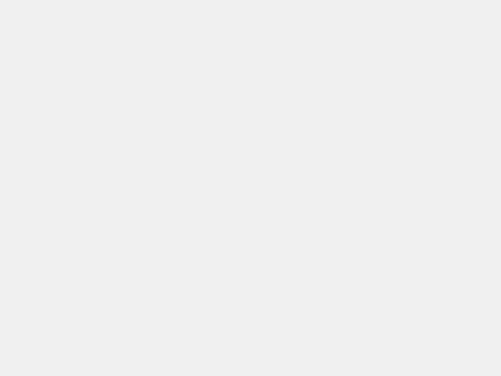</center>


<center>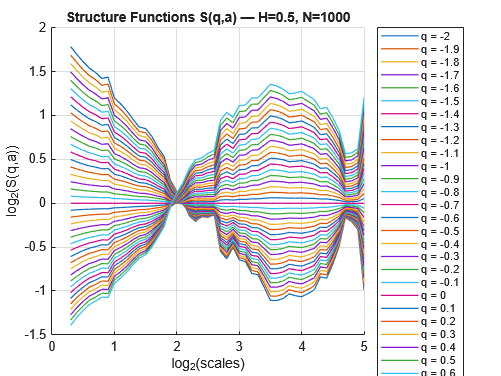</center>


<center>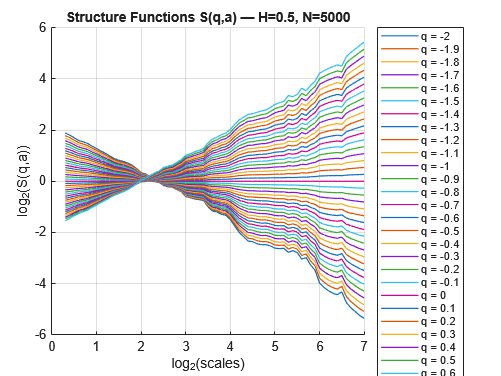</center>


<center>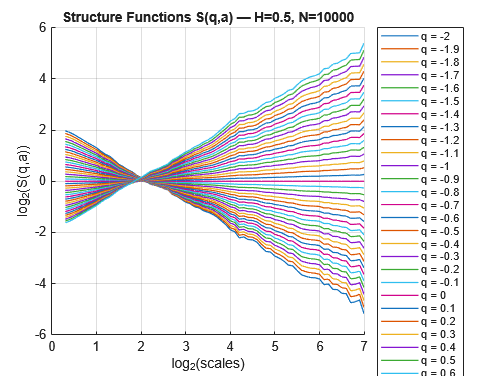</center>


<center>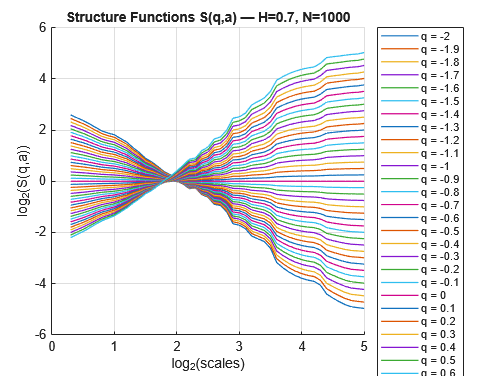</center>


<center>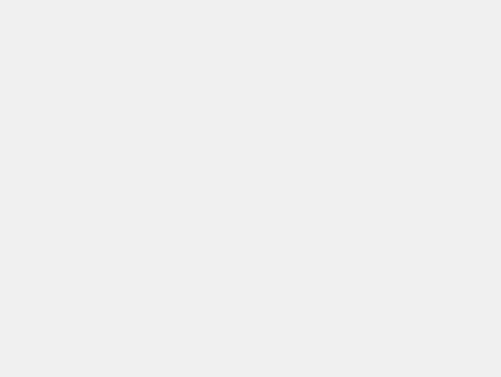</center>


<center>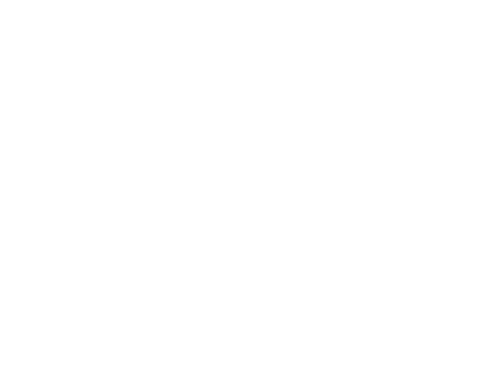</center>




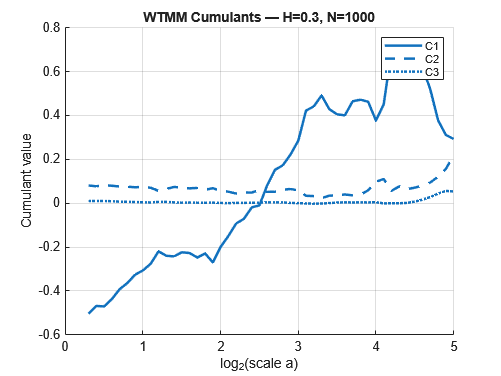


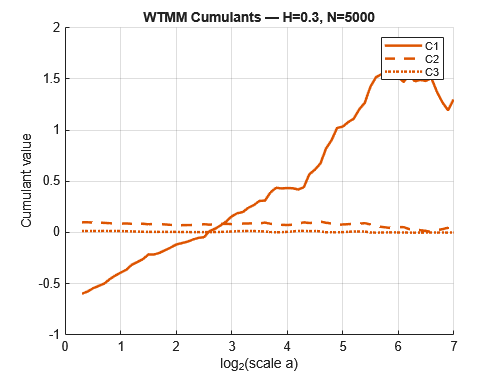

In [3]:

%% ---------------------------------------------------------
% 3. SHOW CUMULANTS C1, C2, C3
% ---------------------------------------------------------
for hi = 1:numH
    for ni = 1:numN
        figure; hold on;

        plot(logscales{hi,ni}, C1{hi,ni}, 'LineWidth', 2, 'Color', colorsN(ni,:))
        plot(logscales{hi,ni}, C2{hi,ni}, '--', 'LineWidth', 2, 'Color', colorsN(ni,:))
        plot(logscales{hi,ni}, C3{hi,ni}, ':', 'LineWidth', 2, 'Color', colorsN(ni,:))

        xlabel("log_2(scale a)")
        ylabel("Cumulant value")
        title("WTMM Cumulants — H="+string(Hvals(hi))+", N="+string(Nvals(ni)))
        legend("C1","C2","C3")
        grid on
    end
end

<center>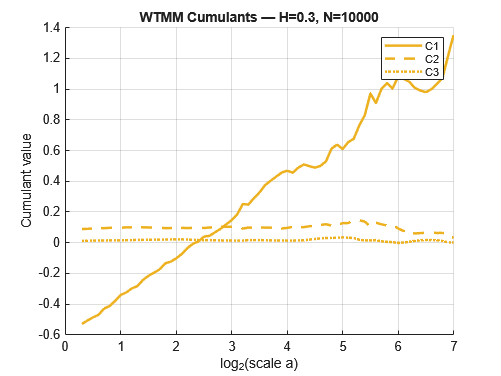</center>


<center>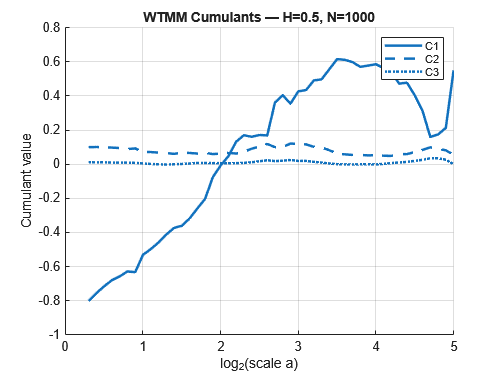</center>


<center>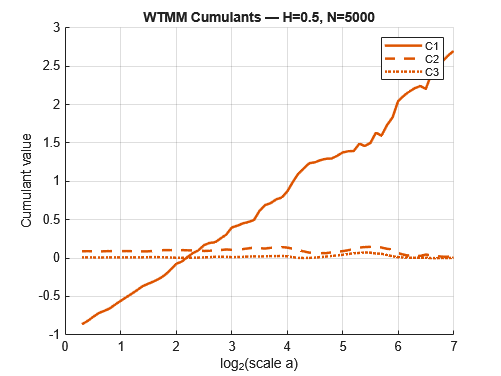</center>


<center>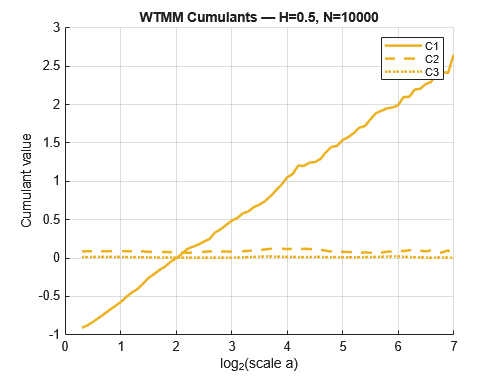</center>


<center>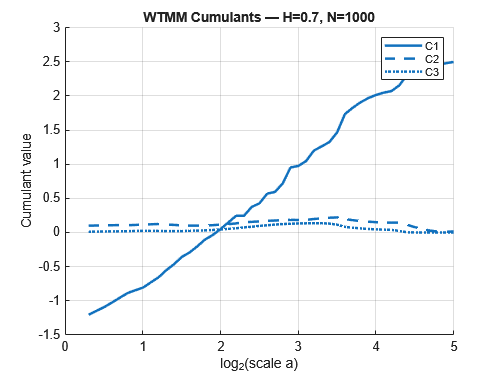</center>


<center>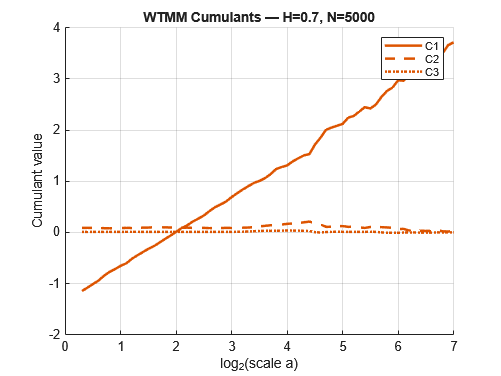</center>


<center>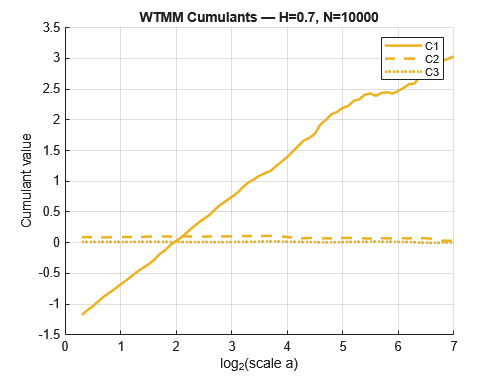</center>



